In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargo el archivo de datos con el que trabajare
data = np.loadtxt('NGC6604_phot.dat',skiprows=2, usecols=(0,4,5)) 
#Creo un DataFrame
df=pd.DataFrame(data, columns=['Est-ID','B','V']) 
#Me deshago de los datos que no me sirven
df.drop(df[df['B'] ==99.999 ].index , inplace=True)
df.drop(df[df['V'] ==99.999 ].index , inplace=True)
#Creo una nueva columna con el color B-V
df['B-V']=df['B']-df['V']
#Reinicio el indice
df=df.reset_index(drop=True)
df

,Est-ID,B,V,B-V
0,1404.0,10.451,9.139,1.312
1,315.0,9.913,9.258,0.655
2,313.0,9.904,9.270,0.634
3,743.0,10.362,9.694,0.668
4,521.0,10.784,10.158,0.626
...,...,...,...,...
350,722.0,20.251,19.157,1.094
351,198.0,20.633,19.166,1.467
352,172.0,20.721,19.194,1.527
353,1432.0,20.633,19.204,1.429


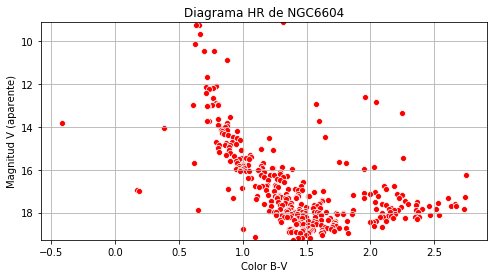

In [3]:
x=df['B-V']
y=df['V']
plt.figure(figsize=[8,4])
ax=sns.scatterplot(x,y,color='r')
plt.title('Diagrama HR de NGC6604')
plt.ylim(max(y), min(y))
plt.xlabel('Color B-V')
plt.ylabel('Magnitud V (aparente)')
plt.grid(True)

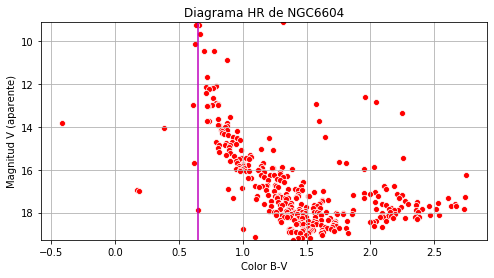

In [48]:
#Datos Del Sol: 
#Color B-V= 0.65
# Magnitud Absoluta MvS=4.8221

plt.figure(figsize=[8,4])
ax=sns.scatterplot(x,y,color='r')
plt.title('Diagrama HR de NGC6604')
plt.ylim(max(y), min(y))
plt.xlabel('Color B-V')
plt.ylabel('Magnitud V (aparente)')
plt.axvline(x=0.65,color='m')
plt.grid(True)

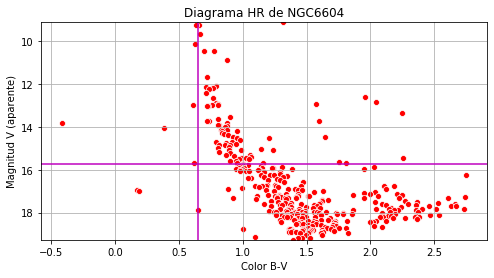

In [4]:
plt.figure(figsize=[8,4])
ax=sns.scatterplot(x,y,color='r')
plt.title('Diagrama HR de NGC6604')
plt.ylim(max(y), min(y))
plt.xlabel('Color B-V')
plt.ylabel('Magnitud V (aparente)')
plt.axvline(x=0.65,color='m')
plt.axhline(y=15.75,color='m')
plt.grid(True)

In [5]:
#Usando el Modulo de distancia Mv-V=5log(D)-5, calculo la distancia D al cúmulo.
#Donde:
Mv=15.75
V=4.8221
D=10**((Mv-V+5)/5)
print('La distancia al cúmulo es (aproximadamente)',"{0:.4f}".format(D),'parsecs')
print('La distancia al cúmulo es (aproximadamente)',"{0:.4f}".format(D*3.262),'años luz')

La distancia al cúmulo es (aproximadamente) 1533.1336 parsecs
La distancia al cúmulo es (aproximadamente) 5001.0818 años luz


In [6]:
#Para obtener el diagrama HR de Teff vs. L/ls

#Uso L=10^(-0.4(V-5logD+5-Mv))
df['L']=10**((-0.4)*((df['V'])-5*np.log10(D)+5-V))
#Teff 
#Para la Temperatura efectiva, hago uso de la aproximacion vista en clase
#En que se obtuvo que Teff=4350.5578*BV**(-0.4897).
#En un rango de color B-V: [0.4160 A 2.7509]
df['Teff']=4350.5578*df['B-V']**(-0.4897)
df

,Est-ID,B,V,B-V,L,Teff
0,1404.0,10.451,9.139,1.312,440.960816,3808.840127
1,315.0,9.913,9.258,0.655,395.184589,5352.190691
2,313.0,9.904,9.270,0.634,390.840896,5438.283369
3,743.0,10.362,9.694,0.668,264.484363,5300.928046
4,521.0,10.784,10.158,0.626,172.504330,5472.206680
...,...,...,...,...,...,...
350,722.0,20.251,19.157,1.094,0.043371,4163.304351
351,198.0,20.633,19.166,1.467,0.043013,3606.152729
352,172.0,20.721,19.194,1.527,0.041918,3536.054634
353,1432.0,20.633,19.204,1.429,0.041534,3652.798035


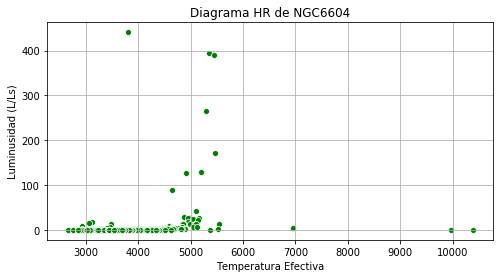

In [7]:
plt.figure(figsize=[8,4])
ax=sns.scatterplot(df['Teff'],df['L'],color='g')
plt.title('Diagrama HR de NGC6604')
plt.xlabel('Temperatura Efectiva')
plt.ylabel('Luminusidad (L/Ls)')
plt.grid(True)

In [8]:
#Para localizar la estrella más luminosa
i=df['L'].max()
#Su temperatura 
Tmax=df['Teff'][df.index[df['L']==i][0]]

#Para obtener el radio uso:
# L=4*pi*R^2*SB*Teff
#Donde SB= 5.67*10^-8 es la constante de Stefan-Boltzmann
SB=5.67e-8
Rmax=np.sqrt(i/(4*np.pi*SB*Tmax**4))

print('La estrella mas luminosa del cumulo tiene:')
print('Una luminusidad',round(i,4),'veces la luminusidad del Sol')
print('Una temperatura efectiva de',round(Tmax,4),'Kelvins')
print('Un radio de',round(Rmax,8),'veces el radio del sol')

La estrella mas luminosa del cumulo tiene:
Una luminusidad 440.9608 veces la luminusidad del Sol
Una temperatura efectiva de 3808.8401 Kelvins
Un radio de 0.00171482 veces el radio del sol


In [9]:
#Para localizar la estrella menos luminosa
j=df['L'].min()
#Su temperatura
Tmin=df['Teff'][df.index[df['L']==j][0]]
#Su radio 
Rmin=np.sqrt(j/(4*np.pi*SB*Tmin**4))

print('La estrella menos luminosa del cumulo tiene:')
print('Una luminusidad',round(j,4),'veces la luminusidad del Sol')
print('Una temperatura efectiva de',round(Tmin,4),'Kelvins')
print('Un radio de',round(Rmin,8),'veces el radio del sol')

La estrella menos luminosa del cumulo tiene:
Una luminusidad 0.0392 veces la luminusidad del Sol
Una temperatura efectiva de 3701.3286 Kelvins
Un radio de 1.712e-05 veces el radio del sol
